In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

## Importing Using Sklearn

In [2]:
from sklearn import datasets

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
def skl_to_df(data_loader):
  x = pd.DataFrame(data_loader.data, columns = data_loader.feature_names)
  y = pd.Series(data_loader.target, name = 'target')
  return x, y

In [5]:
x, y = skl_to_df(datasets.load_breast_cancer())

In [6]:
x.shape

(569, 30)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
x.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_train = np.array(X_train)
x_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)

In [13]:
x_train.shape

(455, 30)

# Data Preprocessing

## Feature Normalization (Mean normalization & Feature Scaling)

In [14]:
def calc_xmean(x):
  mean = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    mean[i] = np.mean(x[:, i])
  return mean

In [15]:
xmean_train = calc_xmean(x_train)
xmean_train

array([1.41176352e+01, 1.91850330e+01, 9.18822418e+01, 6.54377582e+02,
       9.57440220e-02, 1.03619319e-01, 8.88981451e-02, 4.82798703e-02,
       1.81098681e-01, 6.27567692e-02, 4.02015824e-01, 1.20268681e+00,
       2.85825341e+00, 4.00712989e+01, 6.98907473e-03, 2.56354484e-02,
       3.28236723e-02, 1.18939407e-02, 2.05735121e-02, 3.82045560e-03,
       1.62351033e+01, 2.55356923e+01, 1.07103121e+02, 8.76987033e+02,
       1.31532132e-01, 2.52741802e-01, 2.74594569e-01, 1.14182222e-01,
       2.90502198e-01, 8.38678462e-02])

In [16]:
def calc_xstd(x):
  std = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    std[i] = np.std(x[:, 1])
  return std

In [17]:
xstd_train = calc_xstd(x_train)
xstd_train

array([4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404,
       4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404,
       4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404,
       4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404,
       4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404,
       4.26131404, 4.26131404, 4.26131404, 4.26131404, 4.26131404])

In [18]:
def feature_norm(x, mean, std):
  for i in range(x.shape[1]):
    x[:, i] = (x[:, i] - mean[i])/std[i]
  return x

In [19]:
x_train = feature_norm(x_train, xmean_train, xstd_train)
x_train

array([[-1.19414695e+00, -4.35319470e-01, -7.76573646e+00, ...,
         1.42720714e-02,  3.10462456e-02,  7.89243730e-03],
       [ 1.63620066e+00,  1.73302577e+00,  1.19253727e+01, ...,
         4.13294530e-02,  2.79955434e-02,  1.04503337e-02],
       [-1.16035456e+00, -1.24962228e+00, -7.66952200e+00, ...,
        -1.48574410e-02,  8.84652055e-03,  2.42214922e-04],
       ...,
       [ 4.04487521e-02, -5.55000863e-01, -3.71303721e-01, ...,
        -1.89735423e-02, -1.04902379e-02, -5.31944981e-03],
       [-3.22987613e-02,  1.02073452e-01, -1.78874815e-01, ...,
         1.60790257e-02,  6.42942575e-03,  5.07640452e-03],
       [-4.54703678e-01,  3.13275910e-01, -3.44077945e+00, ...,
        -9.35679033e-03, -4.95204006e-03, -3.54065578e-03]])

In [20]:
x_test = feature_norm(x_test, xmean_train, xstd_train)
x_test

array([[-3.86649553e-01, -1.37289334e-01, -2.53260888e+00, ...,
        -2.97612940e-03,  2.55738068e-03,  8.52355357e-04],
       [ 1.13166145e+00,  4.98664735e-01,  7.44318724e+00, ...,
         1.51872820e-02, -8.30781245e-03, -4.21885034e-03],
       [ 3.15011948e-01,  6.92197361e-02,  2.30392742e+00, ...,
         8.73387357e-03, -1.59626766e-03, -8.63077943e-04],
       ...,
       [-6.09585481e-01, -9.98526026e-01, -4.22692193e+00, ...,
        -4.24803754e-03, -5.65604825e-03, -1.35588368e-03],
       [ 2.40218943e-02,  2.03340260e+00,  1.56702425e-01, ...,
        -7.50759548e-03, -2.38194597e-02, -1.38639070e-03],
       [ 1.55171968e+00,  2.80077153e+00,  1.02826870e+01, ...,
         1.21365798e-02, -8.68792530e-04, -3.96085841e-04]])

# Functions before Grad Desc

## Initialization Parameters

In [21]:
def theta_init(x):
  b = 0
  w = np.zeros(x.shape[1])
  return b, w

## Sigmoid Activation Function

In [22]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

## Sigmoid of Input

In [23]:
def sigmoid_g(x, b, w):
  h = sigmoid(np.dot(x, w) + b)
  return h

## Predict Output

In [24]:
def predict_output(x, b, w, k=0.5):
  h = sigmoid_g(x, b, w)
  return h >= k

## Compute Cost

In [25]:
def compute_cost(x, y, b, w):
  m = len(y)
  h = sigmoid_g(x, b, w)
  cost = (-1/m)*( np.dot( (y.T), np.log( h ) ) + np.dot( ( (1-y).T ), np.log(1 - h) ) )
  return cost

##Compute loss (y_pred - y)

In [26]:
def calc_loss(x, y, b, w):
  h = sigmoid_g(x, b, w)
  return (h-y)

# Gradient Descent

## Batch Gradient Descent

In [27]:
def grad_desc(x, y, alpha, n):                           # iter: num of iterations; alpha: learning rate
  m = len(y)
  j_list = []
  b, w = theta_init(x)

  for i in range(n):
    loss = calc_loss(x, y, b, w)
    x_trans = np.transpose(x)
    b = b - ( alpha * np.sum( loss ) ) / m
    w = w - ( alpha * ( np.dot( x_trans, loss ) ) ) / m
    j_list.append( compute_cost(x, y, b, w))

  j_values = np.array(j_list)

  return j_values, b, w

# Fitting on train data Using Gradient Descent

In [28]:
iter = 1000000
alpha = 0.0035
batch_size = 100
j_train, b, w = grad_desc(x_train, y_train, alpha, iter)

In [29]:
def plot_cost():
  plt.title('Cost Funtion: J_train')
  plt.xlabel('No. of iterations ->')
  plt.ylabel('Cost: j_train ->')
  plt.plot(j_train)
  plt.show()

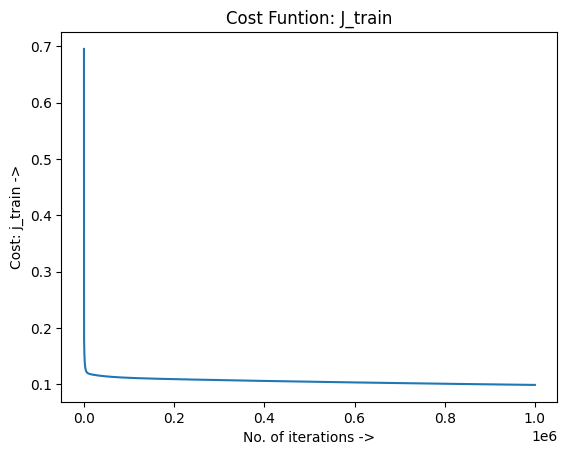

In [30]:
plot_cost()

In [31]:
j_train[iter-1]

0.09884213756341388

In [32]:
b

-0.06636686621841813

In [33]:
w

array([ 2.48570002,  0.97522608, -1.479342  ,  0.13102547, -0.34571992,
       -0.62489837, -1.23039757, -0.61441355, -0.504586  , -0.09722957,
       -0.19782807,  3.96326102,  0.12682911, -0.40741148, -0.04475994,
        0.04244508, -0.13911866, -0.07089901, -0.07683984,  0.01506093,
        0.4263789 , -2.12014455, -0.31302965, -0.06145588, -0.69093247,
       -2.16796318, -3.48320916, -1.16570476, -1.65282741, -0.27975494])

# Baseline accuracy of test data:


BASELINE MODEL: y = 1

In [36]:
def baseline_accuracy(x, y, b, w):
  return sum(y == 1)/len(y)

In [37]:
baseline_accuracy(x_test, y_test, b, w)

0.6228070175438597

# Verification: Calculating accuracy of our model on test data

In [34]:
def accuracy(x, y, b, w):
  y_pred = predict_output(x, b, w)
  return sum(y == y_pred)/len(y)

In [35]:
accuracy(x_test, y_test, b, w)

0.9649122807017544